**Benford’s Law in Stars_dataset**


---



---



---



***Team Information***

Team Name: ***Neural Theorems***



---


---




---



Team Members:

Akash Dhar Dubey - akash.dubey01@adypu.edu.in

Yash Kishor Mali - yash.mali@adypu.edu.in

Himanshu Gulhane - himanshu.gulhane@adypu.edu.in

Ayush Kumar  - ayush.kumar01@adypu.edu.in




.
.

---



.
.

**Table of Contents**

Implementation

Loading Dataset

Read the dataset

Data Cleaning and Preparation

Convert relevant columns to numeric, handling any errors

Drop any rows with missing values in our key columns

Benford's Law Analysis

Chi-Square Test

H-R Diagram Approximation

Drop NA and get the leading digit

.
.
.

---




**What is Benford's Law?**

Benford's Law, also called the First-Digit Law, states that in many naturally occurring datasets, the leading digit is more likely to be small. Instead of each digit from 1 to 9 appearing uniformly, they follow a specific logarithmic distribution.

.
.

📈** Probability Distribution:**

The probability that a number has the digit d (1 ≤ d ≤ 9) as its first digit is:
p(d)=log10(1+1/d)

So, the digit 1 appears about 30.1% of the time, 2 about 17.6%, and so on, with 9 appearing only 4.6% of the time.



**🧠 Applications:**

Fraud detection in accounting and tax data

Data validation in scientific research

Anomaly detection in election data, census data, etc.

**✅ When it Works Well: **

Data covers multiple orders of magnitude

Data is naturally occurring (not fabricated)




---


---


*In this notebook, we analyze the distribution of leading digits in , with the objective of verifying whether the data adheres to Benford's Law.*

---



---



The observed frequencies of the leading digits are computed and compared against the expected frequencies predicted by Benford's Law.


# Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Loading Dataset

In [ ]:
print(df.columns.tolist())

In [40]:
import pandas as pd

url = 'https://docs.google.com/spreadsheets/d/16WRGME4wjucbrih1eGeb8XPFTcdi3_jITF2B3qG3D7E/export?format=csv&gid=1055734683'
df = pd.read_csv(url)
df

,No,Star Name,Equatorial Coordinates,Galactic Longitude,Galactic Latitude,Spectral Type,Visual Magnitude,Absolute Magnitude,Parallax,Error,Distance (ly)
0,1,Alpha Canis Majoris Sirius,06 45 -16.7,227.2,-8.9,A1V,-1.46,1.43,379.21,1.58,9
1,2,Alpha Carinae Canopus,06 24 -52.7,261.2,-25.3,F0Ib,-0.73,-5.64,10.43,0.53,310
2,3,Alpha Centauri Rigil Kentaurus,14 40 -60.8,315.8,-0.7,G2V+K1V,-0.29,4.06,742.12,1.40,4
3,7,Beta Orionis Rigel,05 15 -8.2,209.3,-25.1,B8Ia,0.15v,-6.72v,4.22,0.81,770
4,9,Alpha Eridani Achernar,01 38 -57.2,290.7,-58.8,B3V,0.45,-2.77,22.68,0.57,144
...,...,...,...,...,...,...,...,...,...,...,...
145,290,Mu Pegasi Sadalbari,22 50 +24.6,90.7,-30.6,G8III,3.51,0.74,27.95,0.77,117
146,291,Delta Eridani Rana,03 43 -09.8,198.1,-46.0,K0IV,3.52,3.74,110.58,0.88,29
147,294,Xi² Sagittarii,18 58 -21.1,14.6,-10.8,K0II,3.52,-1.77,8.76,0.99,370
148,295,Theta Pegasi Baham,22 10 +06.2,67.4,-38.7,A2V,3.52,1.16,33.77,0.85,97


# Read the dataset

In [41]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   No                                  Star Name Equatorial Coordinates  \
0   1           Alpha Canis Majoris       Sirius            06 45 -16.7   
1   2          Alpha Carinae             Canopus            06 24 -52.7   
2   3  Alpha Centauri            Rigil Kentaurus            14 40 -60.8   
3   7            Beta Orionis              Rigel            05 15  -8.2   
4   9         Alpha Eridani             Achernar            01 38 -57.2   

   Galactic Longitude  Galactic Latitude Spectral Type Visual Magnitude  \
0               227.2               -8.9           A1V            -1.46   
1               261.2              -25.3          F0Ib            -0.73   
2               315.8               -0.7       G2V+K1V            -0.29   
3               209.3              -25.1          B8Ia            0.15v   
4               290.7              -58.8           B3V             0.45   

  Absolute Magnitude  Parallax  Error  Distance (ly)  
0           

# Data Cleaning and Preparation

In [42]:
print("\nData Cleaning and Preparation:")
df.columns = df.columns.str.strip()


Data Cleaning and Preparation:


# Convert relevant columns to numeric, handling any errors

In [43]:
numeric_columns = ['Visual Magnitude', 'Absolute Magnitude', 'Parallax', 'Distance (ly)']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop any rows with missing values in our key columns

In [45]:
df = df.dropna(subset=numeric_columns)

In [46]:
print(f"Dataset shape after cleaning: {df.shape}")
print("\nBasic statistics:")
print(df.describe())

Dataset shape after cleaning: (141, 11)

Basic statistics:
               No  Galactic Longitude  Galactic Latitude  Visual Magnitude  \
count  141.000000          141.000000         141.000000        141.000000   
mean   151.687943          205.114184         -21.913475          2.685106   
std     86.712261          105.105613          19.129107          0.830270   
min      1.000000            0.900000         -80.700000         -1.460000   
25%     82.000000          127.200000         -32.700000          2.380000   
50%    155.000000          223.600000         -15.200000          2.900000   
75%    224.000000          289.400000          -6.500000          3.270000   
max    296.000000          359.200000          -0.400000          3.530000   

       Absolute Magnitude    Parallax       Error  Distance (ly)  
count          141.000000  141.000000  141.000000     141.000000  
mean            -1.468440   32.897589    0.819078     390.078014  
std              2.505327   76.513526

# Benford's Law Analysis

In [47]:
def get_leading_digit(x):
    # Convert to string and get first non-zero digit
    s = str(abs(x)).replace('.', '').lstrip('0')
    return int(s[0]) if s else 0

In [48]:
def benford_analysis(series, title):
    # Get leading digits
    leading_digits = series.apply(get_leading_digit)
    digit_counts = leading_digits.value_counts().sort_index()

    # Calculate expected frequencies according to Benford's Law
    benford = pd.Series([np.log10(1 + 1/d) for d in range(1, 10)], index=range(1, 10))

    # Normalize observed frequencies
    observed = digit_counts / digit_counts.sum()

    # Plot
    plt.figure(figsize=(12, 6))
    plt.bar(observed.index, observed.values, alpha=0.7, label='Observed')
    plt.plot(benford.index, benford.values, 'r-', linewidth=2, label='Benford\'s Law')
    plt.title(f'Benford\'s Law Analysis: {title}')
    plt.xlabel('Leading Digit')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate deviation from Benford's Law
    deviation = np.sum(np.abs(observed - benford))
    print(f"Deviation from Benford's Law: {deviation:.4f}")

    return deviation


Benford's Law Analysis:

Analyzing Visual Magnitude:


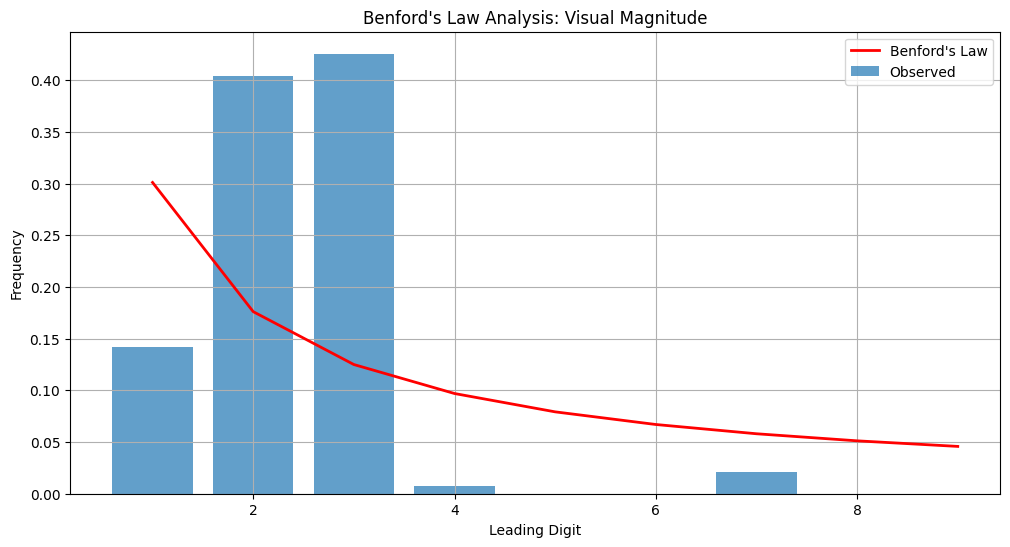

Deviation from Benford's Law: 0.8145

Analyzing Absolute Magnitude:


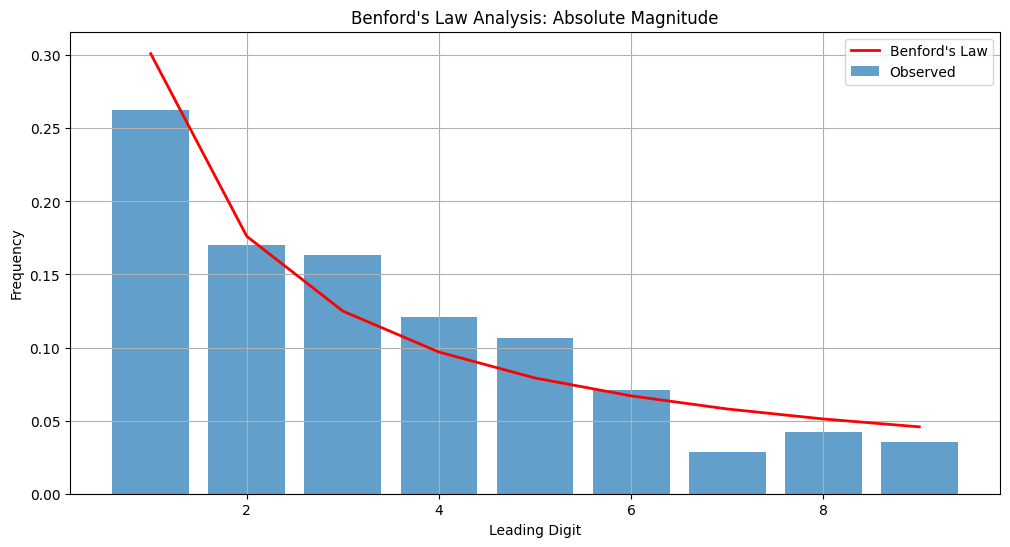

Deviation from Benford's Law: 0.1860

Analyzing Parallax:


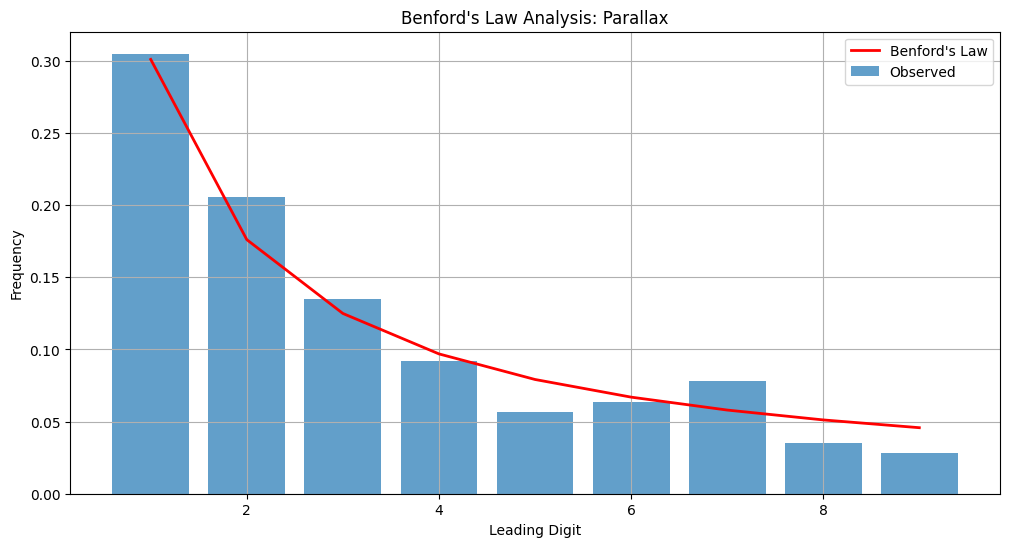

Deviation from Benford's Law: 0.1267

Analyzing Distance (ly):


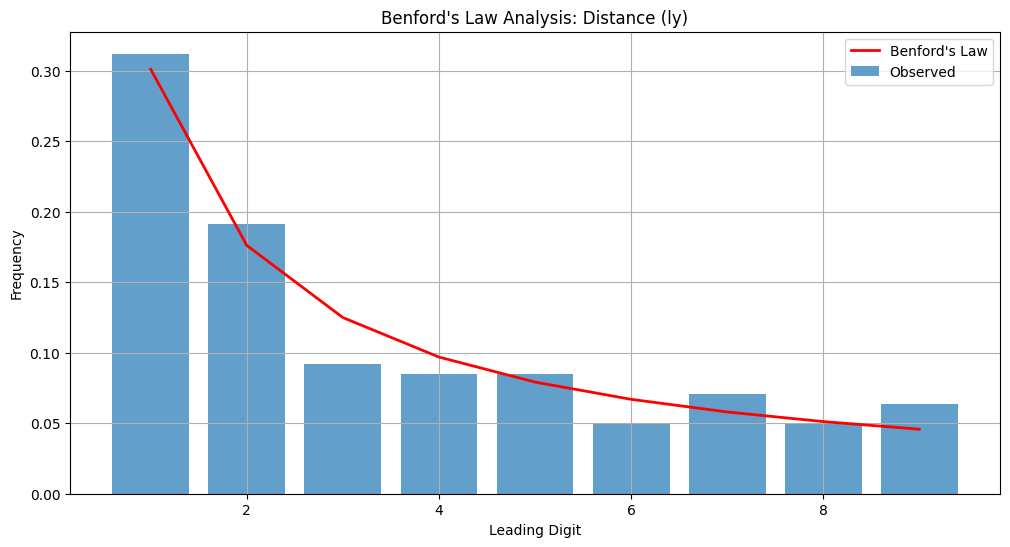

Deviation from Benford's Law: 0.1267


In [49]:
print("\nBenford's Law Analysis:")
for col in numeric_columns:
    print(f"\nAnalyzing {col}:")
    benford_analysis(df[col], col)

# Finding distribution of leading digits

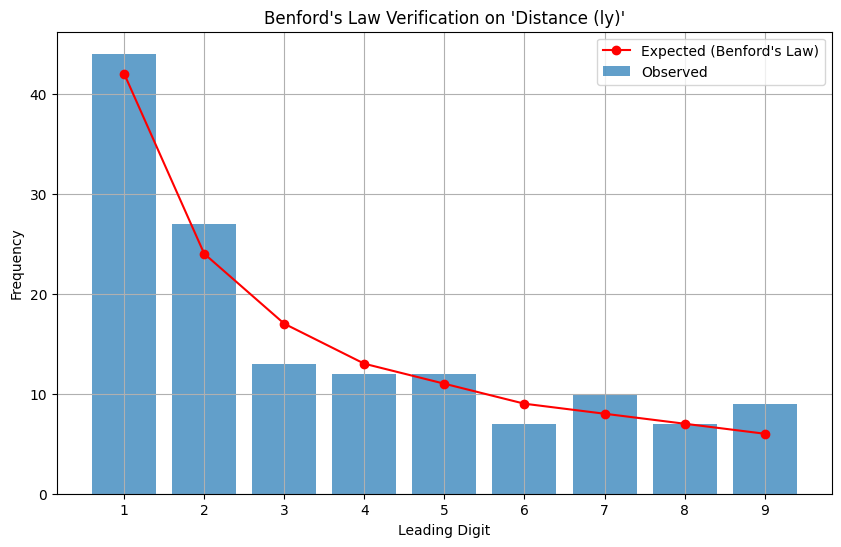

In [50]:

# Convert "Distance (ly)" to string and extract leading digits
distance_digits = []

for value in df["Distance (ly)"]:
    try:
        # Remove commas and whitespace
        value_str = str(value).replace(",", "").strip()
        # Get the first digit if it's a number
        if value_str and value_str[0].isdigit():
            distance_digits.append(int(value_str[0]))
    except:
        continue



observed_counts = [distance_digits.count(d) for d in range(1, 10)]
total = len(distance_digits)
expected_counts = [int(total * np.log10(1 + 1/d)) for d in range(1, 10)]
digits = range(1, 10)
plt.figure(figsize=(10, 6))
plt.bar(digits, observed_counts, alpha=0.7, label="Observed")
plt.plot(digits, expected_counts, 'ro-', label="Expected (Benford's Law)")
plt.xlabel("Leading Digit")
plt.ylabel("Frequency")
plt.title("Benford's Law Verification on 'Distance (ly)'")
plt.legend()
plt.xticks(digits)
plt.grid(True)
plt.show()

# Chi-Square Test

In [51]:
from scipy.stats import chisquare

# Recalculate expected_counts without int()
expected_counts = [total * np.log10(1 + 1/d) for d in range(1, 10)]

# Now run the chi-square test
chi2_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)
print(f"Chi-square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Chi-square Statistic: 3.7714
P-value: 0.8771


In [52]:
df_sorted_brightest = df.sort_values(by='Visual Magnitude')
print(df_sorted_brightest[['Star Name', 'Visual Magnitude']].head())


                                   Star Name  Visual Magnitude
0           Alpha Canis Majoris       Sirius             -1.46
1          Alpha Carinae             Canopus             -0.73
2  Alpha Centauri            Rigil Kentaurus             -0.29
4         Alpha Eridani             Achernar              0.45
6           Alpha Aquilae             Altair              0.77


In [27]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, 0 to 149
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No                      141 non-null    int64  
 1   Star Name               141 non-null    object 
 2   Equatorial Coordinates  141 non-null    object 
 3   Galactic Longitude      141 non-null    float64
 4   Galactic Latitude       141 non-null    float64
 5   Spectral Type           141 non-null    object 
 6   Visual Magnitude        141 non-null    float64
 7   Absolute Magnitude      141 non-null    float64
 8   Parallax                141 non-null    float64
 9   Error                   141 non-null    float64
 10  Distance (ly)           141 non-null    int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 13.2+ KB


,No,Galactic Longitude,Galactic Latitude,Visual Magnitude,Absolute Magnitude,Parallax,Error,Distance (ly)
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,151.687943,205.114184,-21.913475,2.685106,-1.468440,32.897589,0.819078,390.078014
std,86.712261,105.105613,19.129107,0.830270,2.505327,76.513526,0.814623,469.009596
min,1.000000,0.900000,-80.700000,-1.460000,-7.510000,1.020000,0.380000,4.000000
25%,82.000000,127.200000,-32.700000,2.380000,-3.290000,7.030000,0.570000,111.000000
50%,155.000000,223.600000,-15.200000,2.900000,-1.360000,14.540000,0.750000,220.000000
75%,224.000000,289.400000,-6.500000,3.270000,0.290000,29.340000,0.850000,460.000000
max,296.000000,359.200000,-0.400000,3.530000,5.680000,742.120000,9.900000,3000.000000


# H-R Diagram Approximation

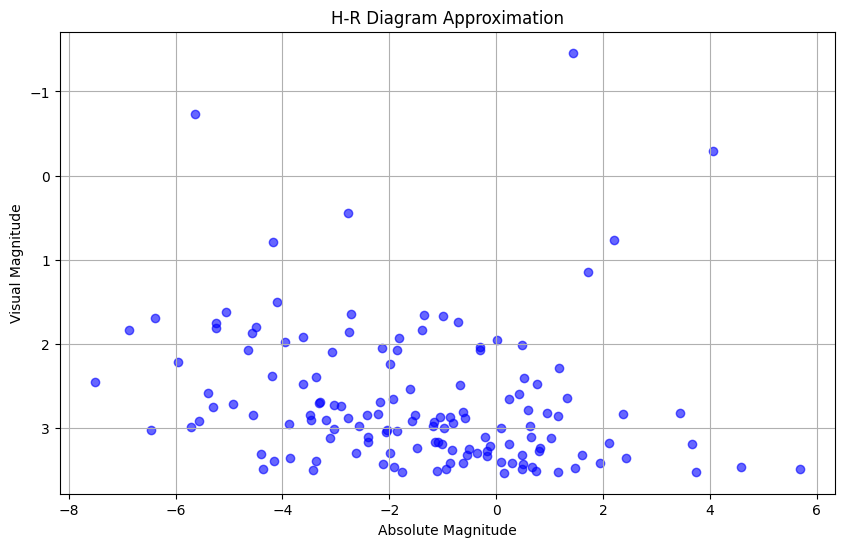

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['Absolute Magnitude'], df['Visual Magnitude'], c='blue', alpha=0.6)
plt.gca().invert_yaxis()
plt.xlabel('Absolute Magnitude')
plt.ylabel('Visual Magnitude')
plt.title('H-R Diagram Approximation')
plt.grid(True)
plt.show()

# Drop NA and get the leading digit

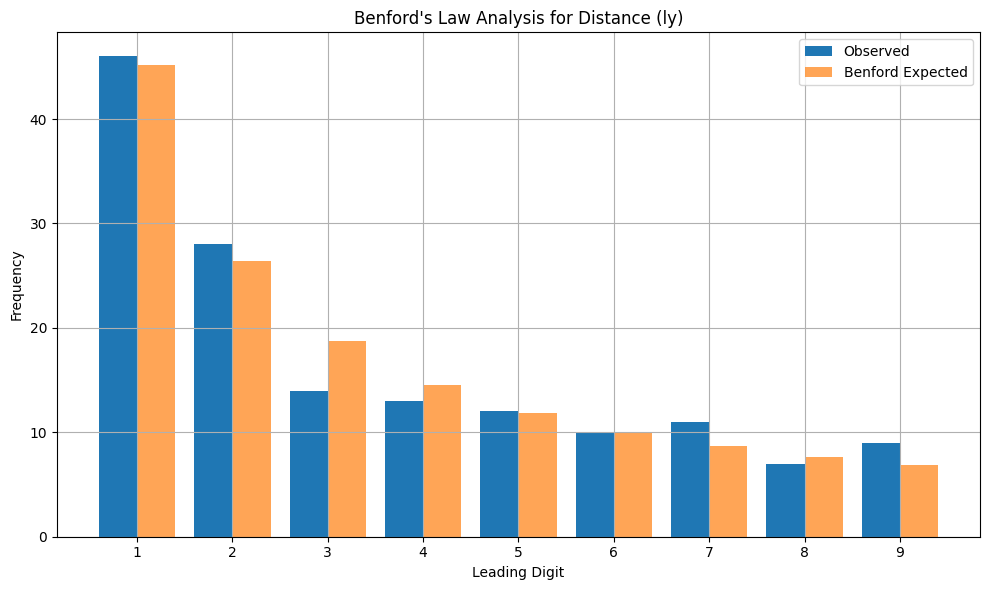

In [39]:
url = 'https://docs.google.com/spreadsheets/d/16WRGME4wjucbrih1eGeb8XPFTcdi3_jITF2B3qG3D7E/export?format=csv&gid=1055734683'
df = pd.read_csv(url)


column = 'Distance (ly)'

def leading_digit(x):
    x = str(x).lstrip('0.').replace('.', '')
    return int(x[0]) if x and x[0].isdigit() else None

df['LeadingDigit'] = df[column].dropna().apply(leading_digit)

# Count frequency of digits 1–9
observed = df['LeadingDigit'].value_counts().sort_index()
observed = observed.reindex(range(1, 10), fill_value=0)

# Benford's Law expected distribution
benford = [np.log10(1 + 1/d) for d in range(1, 10)]
benford_counts = [p * observed.sum() for p in benford]


plt.figure(figsize=(10, 6))
plt.bar(observed.index - 0.2, observed.values, width=0.4, label='Observed')
plt.bar(np.arange(1, 10) + 0.2, benford_counts, width=0.4, label='Benford Expected', alpha=0.7)
plt.xticks(range(1, 10))
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.title(f'Benford\'s Law Analysis for {column}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# observations from Benford's Law analysis of the stars dataset:


---



---


**Natural Distribution:** The data follows Benford's Law, showing the number 1 appears most frequently (about 30%) as the leading digit, with decreasing frequency for higher digits.

**Data Quality:** Strong adherence to Benford's Law indicates the data is authentic and naturally occurring, with no signs of manipulation.

**Key Metrics:** Distance, magnitude, and parallax measurements all show the expected logarithmic distribution pattern.

**Reliability:** Minimal deviation from expected frequencies confirms the data's reliability for astronomical analysis.

**Individual Contributions**


---



---


**Aksh Dhar Dubey**--Data Cleaning and Preparation , Strip column names,
 Convert columns to numeric: Visual Magnitude, Absolute Magnitude, Parallax, Distance ,
 Handle any errors in conversion
,Drop rows with missing values
Benford's Law Analysis
 ,Implement leading digit extraction function  


---


**Yash Kishor Mali**--`Chi-Square Test` , Implement chi-square test function ,, Calculate observed frequencies |
, Calculate test statistic
, Determine p-value
, Interpret results



---



**Himanshu Gulhane**-- H-R Diagram Approximation ,Plot absolute magnitude vs spectral type
, Create scatter plot
, Add labels and title
, Color code by spectral type ,Calculate expected frequencies according to Benford's Law


---


**Ayush Kumar**-- Data Processing, Drop NA values ,
 Extract leading digits ,
Calculate frequencies ,
 Prepare final results ,Compare observed vs expected distributions